In [72]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#load dataset
df = pd.read_csv('/content/HSBC_ST138D-XLS-ENG (2).csv')

In [ ]:
#view first few rows
df.head()

,AGE,INCOME,TRB,DIG_ACTIVE,FX_TRANS,PAYME,CC,LN,MT,TD,SC,SP,BD,MPF
0,30-34,9012.13,62051.47,0,0,1,0,0,0,0,0,0,0,1
1,30-34,44108.03,4.05,1,0,0,1,0,0,0,0,0,0,0
2,25-29,45782.41,291996.00,1,0,0,0,0,0,0,0,0,0,0
3,30-34,26525.41,81.50,1,0,0,0,0,0,0,1,0,0,0
4,30-34,20671.51,1447.01,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE         50000 non-null  object 
 1   INCOME      50000 non-null  float64
 2   TRB         50000 non-null  float64
 3   DIG_ACTIVE  50000 non-null  int64  
 4   FX_TRANS    50000 non-null  int64  
 5   PAYME       50000 non-null  int64  
 6   CC          50000 non-null  int64  
 7   LN          50000 non-null  int64  
 8   MT          50000 non-null  int64  
 9   TD          50000 non-null  int64  
 10  SC          50000 non-null  int64  
 11  SP          50000 non-null  int64  
 12  BD          50000 non-null  int64  
 13  MPF         50000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 5.3+ MB


In [ ]:
df.shape

(50000, 14)

In [ ]:
#handle missing values

# Check for missing values
print(df.isnull().sum())

AGE           0
INCOME        0
TRB           0
DIG_ACTIVE    0
FX_TRANS      0
PAYME         0
CC            0
LN            0
MT            0
TD            0
SC            0
SP            0
BD            0
MPF           0
dtype: int64


In [ ]:
df.describe()

,INCOME,TRB,DIG_ACTIVE,FX_TRANS,PAYME,CC,LN,MT,TD,SC,SP,BD,MPF
count,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,3.123016e+04,1.627904e+05,0.818160,0.237360,0.66570,0.48838,0.076440,0.077520,0.093200,0.096360,0.049880,0.071360,0.28964
std,2.589240e+04,3.917090e+05,0.385716,0.425469,0.47175,0.49987,0.265703,0.267417,0.290715,0.295087,0.217699,0.257428,0.45360
min,-1.966988e+04,0.000000e+00,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.855612e+04,4.681005e+03,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2.710789e+04,3.790827e+04,1.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,3.986781e+04,1.703579e+05,1.000000,0.000000,1.00000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,1.380715e+06,2.282008e+07,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
df['AGE'].value_counts()

,count
AGE,
30-34,19032
25-29,16303
18-24,14665


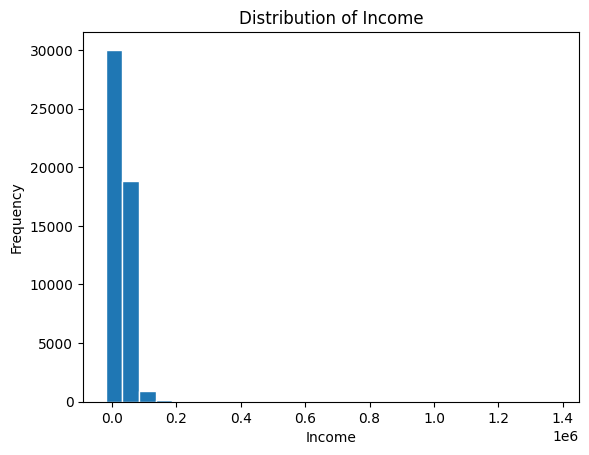

In [ ]:
plt.hist(df['INCOME'], bins=27, edgecolor='white')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

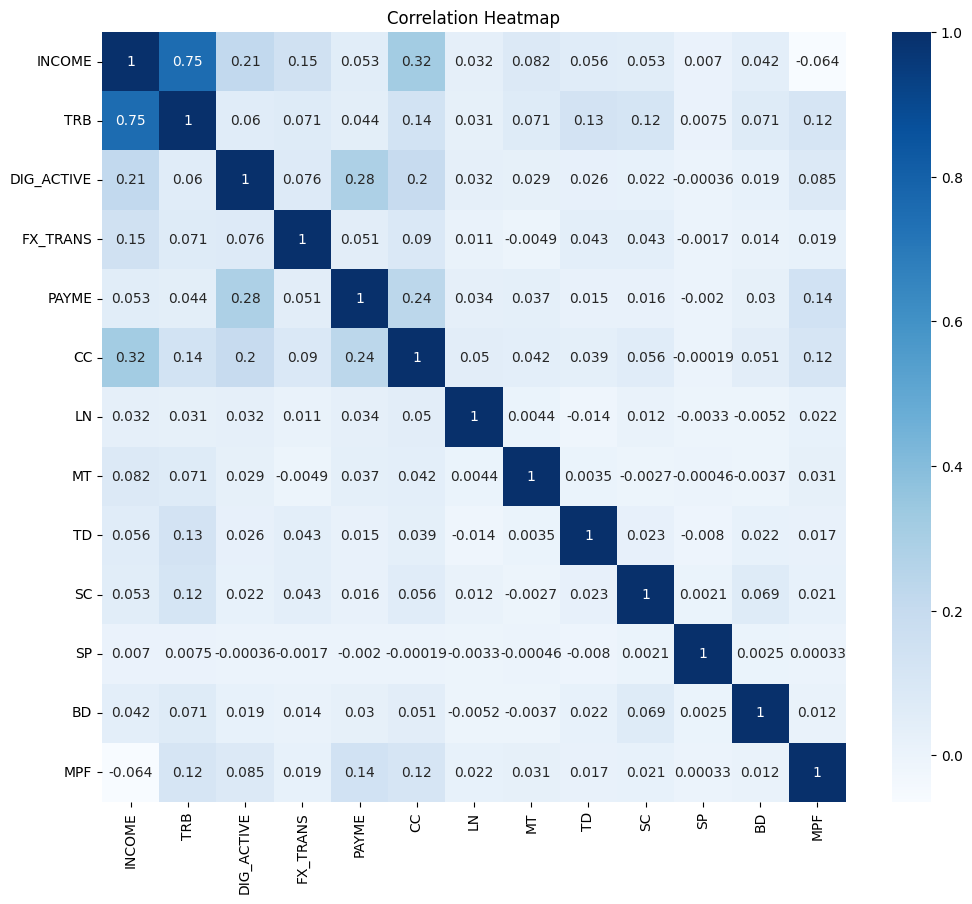

In [ ]:
features_to_check = ['INCOME', 'TRB', 'DIG_ACTIVE', 'FX_TRANS', 'PAYME', 'CC', 'LN', 'MT', 'TD', 'SC', 'SP', 'BD', 'MPF']
correlation_matrix = df[features_to_check].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
income_by_cc = df.groupby('CC')['INCOME'].mean()
trb_by_cc = df.groupby('CC')['TRB'].mean()

print("Average INCOME for each CC group:\n", income_by_cc)
print("Average TRB for each CC group:\n", trb_by_cc)

Average INCOME for each CC group:
 CC
0    23142.444763
1    39702.740219
Name: INCOME, dtype: float64
Average TRB for each CC group:
 CC
0    109698.857534
1    218408.426561
Name: TRB, dtype: float64


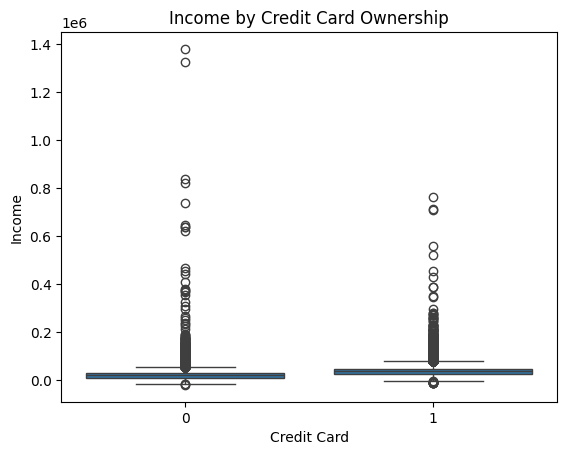

In [ ]:
sns.boxplot(data=df, x='CC', y='INCOME')
plt.title('Income by Credit Card Ownership')
plt.xlabel('Credit Card')
plt.ylabel('Income')
plt.show()

In [63]:
#Creating new features
product_cols = ['CC', 'LN', 'MT', 'TD', 'SC', 'SP', 'BD', 'MPF']
df['Total_Products'] = df[product_cols].sum(axis=1)

df['Age_Code'] = pd.Categorical(df['AGE']).codes

df['TRB_Income_Ratio'] = df['TRB'] / (df['INCOME'] + 1e-5)

df['Is_FX_User'] = df['FX_TRANS'].gt(0).astype(int)
df['Is_PAYME_User'] = df['PAYME'].gt(0).astype(int)

df['Multi_Product_Flag'] = (df['Total_Products'] > 2).astype(int)

#selecting features
features_for_model = ['INCOME', 'TRB', 'DIG_ACTIVE', 'FX_TRANS', 'PAYME', 'Num_Products', 'Age_Group_Code', 'TRB_Income_Ratio', 'FX_User_Flag', 'PayMe_User_Flag', 'Multi_Product_User']

X = df[features_for_model]

In [90]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

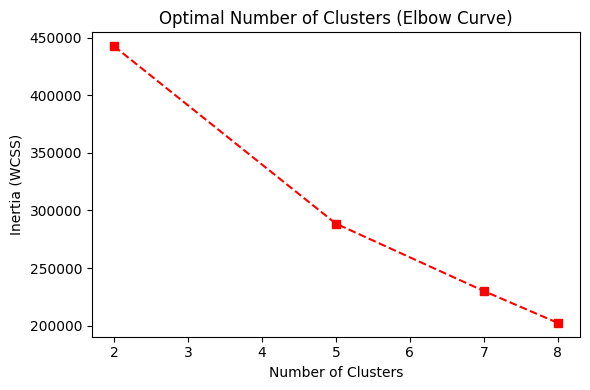

In [91]:
# Elbow Method
from sklearn.cluster import KMeans

inertia_scores = []
k_choices = [2, 5, 7, 8]

for k in k_choices:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X_scaled)
    inertia_scores.append(kmeans_model.inertia_)

#plotting elbow curve
plt.figure(figsize=(6, 4))
plt.plot(k_choices, inertia_scores, marker='s', linestyle='--', color='red')
plt.title('Optimal Number of Clusters (Elbow Curve)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.tight_layout()
plt.show()

In [92]:
#running k-means with chosen k
chosen_k = 5
kmeans_model = KMeans(n_clusters=chosen_k, random_state=42)
df['Cluster'] = kmeans_model.fit_predict(X_scaled)



In [88]:
# Calculate and display Silhouette Score
silhouette = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score:", silhouette)

Silhouette Score: 0.27260289860431947


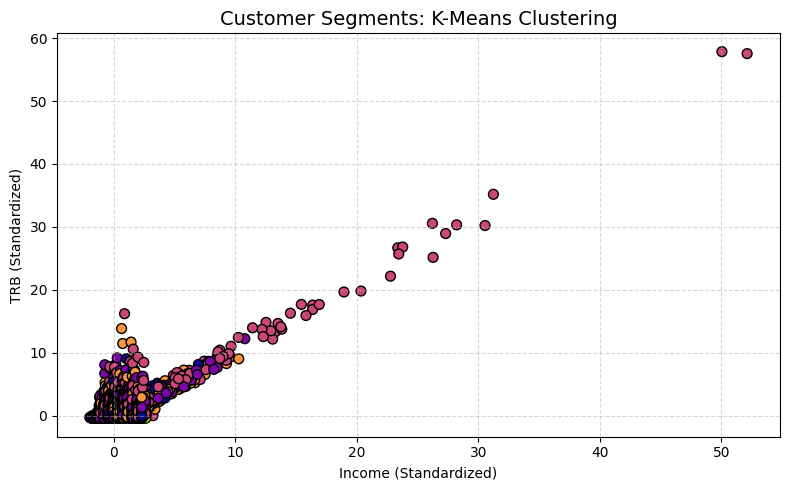

In [97]:
#cluster centers
cluster_centers_unscaled = scaler.inverse_transform(kmeans_model.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers_unscaled, columns=features)

#plotting
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c= kmeans_model.fit_predict(X_scaled) , cmap='plasma', edgecolor='k', s=50)
plt.xlabel('Income (Standardized)')
plt.ylabel('TRB (Standardized)')
plt.title('Customer Segments: K-Means Clustering', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

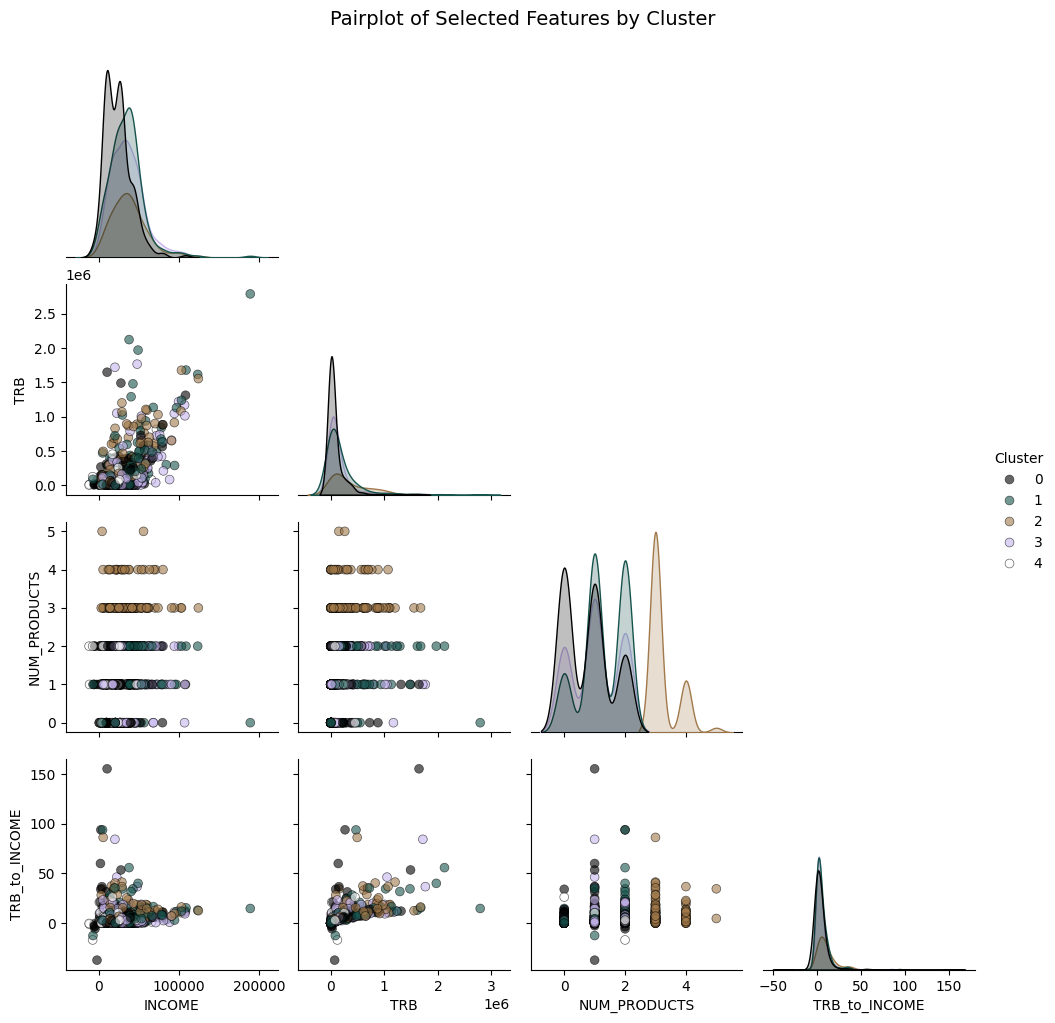

In [98]:
#visualising in the form of a pairplot
selected_features = ['INCOME', 'TRB', 'NUM_PRODUCTS', 'TRB_to_INCOME']
plot_sample = df.sample(n=1000, random_state=1)

sns.pairplot(data=plot_sample[selected_features + ['Cluster']],
             hue='Cluster',
             palette='cubehelix',
             corner=True,
             plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'})

plt.suptitle('Pairplot of Selected Features by Cluster', fontsize=14, y=1.02)
plt.show()

<ipython-input-99-25126fd8bafc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='INCOME', palette='Set2', width=0.6)


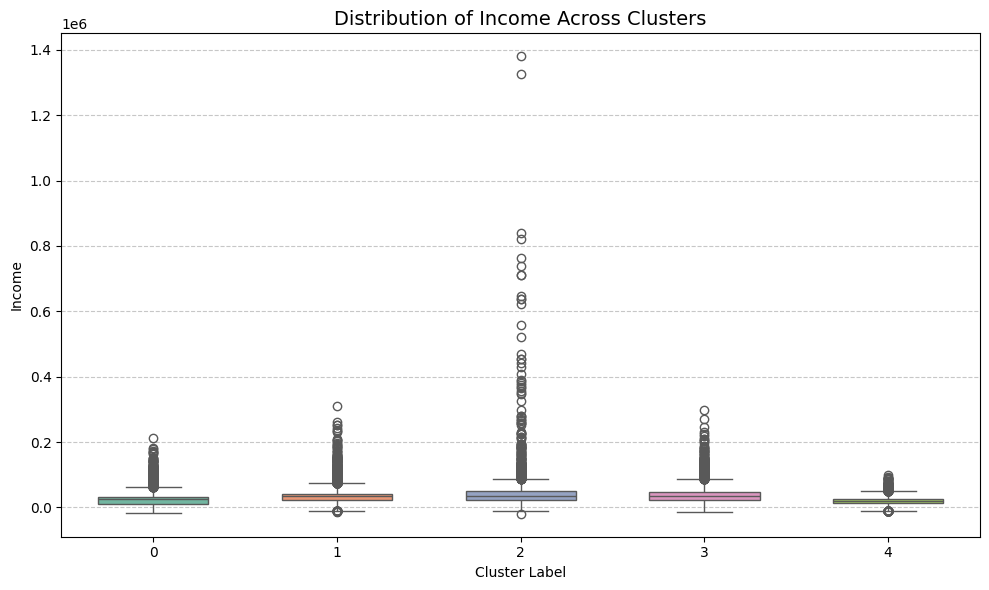

In [99]:
#Plotting boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cluster', y='INCOME', palette='Set2', width=0.6)
plt.title('Distribution of Income Across Clusters', fontsize=14)
plt.xlabel('Cluster Label')
plt.ylabel('Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [100]:
# Compute silhouette score
silhouette_val = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score:", silhouette_val)

# Inverse transform cluster centers to original scale
original_centers = scaler.inverse_transform(kmeans_model.cluster_centers_)
cluster_centers_df = pd.DataFrame(original_centers, columns=features)

# Display cluster-wise feature means
cluster_summary = df.groupby('Cluster')[features].mean()

# Output
silhouette_val, cluster_centers_df, cluster_summary

Silhouette Score: 0.27260289860431947


(np.float64(0.27260289860431947),
          INCOME            TRB  DIG_ACTIVE      FX_TRANS         PAYME  \
 0  25441.421986   96280.383822    0.626996 -3.164136e-14  1.276756e-14   
 1  35100.588929  193616.137887    0.913439 -2.658984e-14  9.999149e-01   
 2  42525.111908  414367.282818    0.911571  3.059416e-01  7.998610e-01   
 3  36999.356440  175435.044191    0.859602  1.000000e+00  6.873454e-01   
 4  21516.094372   51315.486385    0.847687 -9.603429e-15  1.000000e+00   
 
    NUM_PRODUCTS  AGE_GROUP_NUM  TRB_to_INCOME       FX_USER    PAYME_USER  \
 0      0.757862       1.088776       3.892175 -3.164136e-14  1.276756e-14   
 1      1.311601       1.659886       9.180319 -2.658984e-14  9.999149e-01   
 2      3.211258       1.308374      11.895577  3.059416e-01  7.998610e-01   
 3      1.073711       1.046502       6.313881  1.000000e+00  6.873454e-01   
 4      0.800521       0.325856       6.914831 -9.603429e-15  1.000000e+00   
 
    MULTI_PRODUCT_USER  
 0        7.827072e

**Interpretations of Clusters**



**Cluster 0:**

**Income:**  25,442,TRB: 96,327

**Product Usage:** Low (~0.76 products). Minimal activity in PAYME and FX.

**Strategy:** Focus on providing entry-level services and basic goods to consumers on a tight budget.



**Cluster 1:**

**Income:**  28,626,TRB: 124,192

**Product Usage:** Moderate (~1.08 products), PAYME users, minimal FX.

**Strategy:** Offer mid-range goods like savings plans and loans.



**Cluster 2:**

**Income:** 43,317,TRB: 427,744

**Product Usage:** High (~3.20 products), active PAYME and FX users.

**Strategy:** Offer cross-selling opportunities, exclusive services, and wealth management.



**Cluster 3:**

**Income:** 36,999,TRB: 175,435

**Product Usage:** Moderate (~1.07 products), low FX and PAYME activity.

**Strategy:** Focus on mid-to-high tier goods, such as loans and credit services.





**Important points to note**



**TRB to INCOME Ratio:** High ratios in Cluster 2 suggest high fund flows in relation to income or more active wealth management.



**NUM_PRODUCTS:** Cluster 1 exhibits high levels of client engagement and loyalty. To boost product usage, Cluster 0 requires focused onboarding.



**Users of FX and PAYME:** High in Cluster 1, indicating users who are transactionally active and tech-savvy.
